# Programación lineal

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Linear_Programming_Feasible_Region.svg/2000px-Linear_Programming_Feasible_Region.svg.png" width="400px" height="125px" />

> La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.

**Referencias:**
- https://es.wikipedia.org/wiki/Programaci%C3%B3n_lineal
- https://docs.scipy.org/doc/scipy-0.18.1/reference/optimize.html

## 1. Apuntes históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/5e/JohnvonNeumann-LosAlamos.gif" width="400px" height="125px" />

- 1826:	Joseph Fourier anticipa la programación lineal. Carl Friedrich Gauss resuelve ecuaciones lineales por eliminación "gaussiana".
- 1902:	Gyula Farkas concibe un método para resolver sistemas de inecuaciones.
- Es hasta la Segunda Guerra Mundial que se plantea la programación lineal como un modelo matemático para planificar gastos y retornos, de modo que se reduzcan costos de guerra y aumentar pérdidas del enemigo. Secreto hasta 1947 (posguerra).
- 1947:	George Dantzig publica el algoritmo simplex y John von Neumann desarrolló la teoría de la dualidad. Se sabe que Leonid Kantoróvich también formuló la teoría en forma independiente.
- Fue usado por muchas industrias en la planificación diaria.

**Hasta acá, tiempos exponenciales de solución. Lo siguiente, tiempo polinomial.**

- 1979: Leonid Khachiyan, diseñó el llamado Algoritmo del elipsoide, a través del cual demostró que el problema de la programación lineal es resoluble de manera eficiente, es decir, en tiempo polinomial.
- 1984: Narendra Karmarkar introduce el método del punto interior para resolver problemas de programación lineal.

**Mencionar complejidad computacional.**

## 2. Motivación

Cuando se quiere optimizar una función de varias variables con restricciones, se puede aplicar siempre el método de Multiplicadores de Lagrange. Sin embargo, este método es computacionalmente muy complejo conforme crece el número de variables.

Por tanto, cuando la función a optimizar y las restricciones son de caracter lineal, los métodos de solución que se pueden desarrollar son computacionalmente eficientes, por lo que es útil realizar la distinción.

## 3. Problemas de programación lineal

De acuerdo a lo descrito anteriormente, un problema de programación lineal puede escribirse en la siguiente forma:

\begin{equation}
\begin{array}{ll}
\min_{x_1,\dots,x_n} & c_1x_1+\dots+c_nx_n \\
\text{s. a. }        & a^{eq}_{j,1}x_1+\dots+a^{eq}_{j,n}x_n=b^{eq}_j \text{ para } 1\leq j\leq m_1 \\
                     & a_{k,1}x_1+\dots+a_{k,n}x_n\leq b_k \text{ para } 1\leq k\leq m_2,
\end{array}
\end{equation}
donde:
- $x_i$ para $i=1,\dots,n$ son las incógnitas o variables de decisión,
- $c_i$ para $i=1,\dots,n$ son los coeficientes de la función a optimizar,
- $a^{eq}_{j,i}$ para $j=1,\dots,m_1$ e $i=1,\dots,n$, son los coeficientes de la restricción de igualdad,
- $a_{k,i}$ para $k=1,\dots,m_2$ e $i=1,\dots,n$, son los coeficientes de la restricción de desigualdad,
- $b^{eq}_j$ para $j=1,\dots,m_1$ son valores conocidos que deben ser respetados estrictamente, y
- $b_k$ para $k=1,\dots,m_2$ son valores conocidos que no deben ser superados.

Equivalentemente, el problema puede escribirse como

\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
donde:
- $\boldsymbol{x}=\left[x_1\quad\dots\quad x_n\right]^T$,
- $\boldsymbol{c}=\left[c_1\quad\dots\quad c_n\right]^T$,
- $\boldsymbol{A}_{eq}=\left[\begin{array}{ccc}a^{eq}_{1,1} & \dots & a^{eq}_{1,n}\\ \vdots & \ddots & \vdots\\ a^{eq}_{m_1,1} & \dots & a^{eq}_{m_1,n}\end{array}\right]$,
- $\boldsymbol{A}=\left[\begin{array}{ccc}a_{1,1} & \dots & a_{1,n}\\ \vdots & \ddots & \vdots\\ a_{m_2,1} & \dots & a_{m_2,n}\end{array}\right]$,
- $\boldsymbol{b}_{eq}=\left[b^{eq}_1\quad\dots\quad b^{eq}_{m_1}\right]^T$, y
- $\boldsymbol{b}=\left[b_1\quad\dots\quad b_{m_2}\right]^T$.

**Nota:** el problema $\max_{\boldsymbol{x}}\boldsymbol{g}(\boldsymbol{x})$ es equivalente a $\min_{\boldsymbol{x}}-\boldsymbol{g}(\boldsymbol{x})$.

## 4. Ejemplo básico
Una compañía produce dos productos ($X_1$ y $X_2$) usando dos máquinas ($A$ y $B$). Cada unidad de $X_1$ que se produce requiere 50 minutos en la máquina $A$ y 30 minutos en la máquina $B$. Cada unidad de $X_2$ que se produce requiere 24 minutos en la máquina $A$ y 33 minutos en la máquina $B$.

Al comienzo de la semana hay 30 unidades de $X_1$ y 90 unidades de $X_2$ en inventario. El tiempo de uso disponible de la máquina $A$ es de 40 horas y el de la máquina $B$ es de 35 horas.

La demanda para $X_1$ en la semana actual es de 75 unidades y de $X_2$ es de 95 unidades. La política de la compañía es maximizar la suma combinada de unidades de $X_1$ e $X_2$ en inventario al finalizar la semana.

Formular el problema de decidir cuánto hacer de cada producto en la semana como un problema de programación lineal.

### Solución

Sean:
- $x_1$ la cantidad de unidades de $X_1$ a ser producidas en la semana, y
- $x_2$ la cantidad de unidades de $X_2$ a ser producidas en la semana.

Notar que lo que se quiere es maximizar $x_1+x_2$.

Restricciones:
1. El tiempo de uso disponible de la máquina $A$ es de 40 horas: $50x_1+24x_2\leq 40(60)\Rightarrow 50x_1+24x_2\leq 2400$.
2. El tiempo de uso disponible de la máquina $B$ es de 35 horas: $30x_1+33x_2\leq 35(60)\Rightarrow 30x_1+33x_2\leq 2100$.
3. La demanda para $X_1$ en la semana actual es de 75 unidades: $x_1+30\geq 75\Rightarrow x_1\geq 45\Rightarrow -x_1\leq -45$.
4. La demanda para $X_2$ en la semana actual es de 95 unidades: $x_2+90\geq 95\Rightarrow x_2\geq 5\Rightarrow -x_2\leq -5$.

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_1,x_2} & -x_1-x_2 \\
\text{s. a. }  & 50x_1+24x_2\leq 2400 \\
               & 30x_1+33x_2\leq 2100 \\
               & -x_1\leq -45 \\
               & -x_2\leq -5,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[-1 \quad -1\right]^T$,
- $\boldsymbol{A}=\left[\begin{array}{cc}50 & 24 \\ 30 & 33\\ -1 & 0\\ 0 & -1\end{array}\right]$, y
- $\boldsymbol{b}=\left[2400\quad 2100\quad -45\quad -5\right]^T$.

Preferiremos, en adelante, la notación vectorial/matricial.

Este problema está sencillo pues solo es en dos variables. La solución gráfica es válida.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
def res1(x1):
    return (2400-50*x1)/24
def res2(x1):
    return (2100-30*x1)/33

In [4]:
x1 = np.linspace(40, 50)
r1 = res1(x1)
r2 = res2(x1)

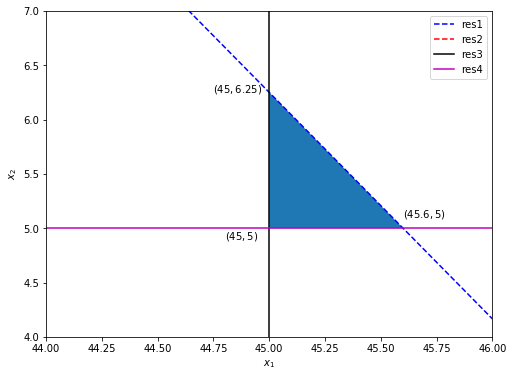

In [5]:
plt.figure(figsize = (8,6))
plt.plot(x1, res1(x1), 'b--', label = 'res1')
plt.plot(x1, res2(x1), 'r--', label = 'res2')
plt.plot([45, 45], [0, 25], 'k', label = 'res3')
plt.plot([40, 50], [5, 5], 'm', label = 'res4')
plt.fill_between(np.array([45.0, 45.6]), res1(np.array([45.0, 45.6])), 5*np.ones(2))
plt.text(44.8,4.9,'$(45,5)$',fontsize=10)
plt.text(44.75,6.25,'$(45,6.25)$',fontsize=10)
plt.text(45.6,5.1,'$(45.6,5)$',fontsize=10)
plt.legend(loc = 'best')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([44, 46, 4, 7])
plt.show()

## 5. ¿Cómo se resuelve en python?

### 5.1 Librería `SciPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://scipy.org/_static/images/scipy_med.png" width="200px" height="75px" />

`SciPy` es un software de código abierto basado en `Python` para matemáticas, ciencia e ingeniería. 

En particular, los siguientes son algunos de los paquetes básicos:
- `NumPy`
- **Librería `SciPy`**
- `SymPy`
- `matplotlib`
- `pandas`

La **Librería `SciPy`** es uno de los paquetes principales y provee varias rutinas numéricas eficientes. Entre ellas, para integración numérica y optimización.

En esta clase, y en lo que resta del módulo, estaremos utilizando el módulo `optimize` de la librería `SciPy`.

In [7]:
import scipy.optimize as opt

El módulo `optimize` que acabamos de importar contiene varias funciones para optimización y búsqueda de raices ($f(x)=0$). Entre ellas se encuentra la función `linprog`

In [8]:
help(opt.linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form:
    
    Minimize:     c^T * x
    
    Subject to:   A_ub * x <= b_ub
                  A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by x, gives the values of the
        upper-bound inequality constraints at x.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in A_ub.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by x, gives the values of the
     

### 5.2 Solución del ejemplo básico con linprog
Ya hicimos la solución gráfica. Contrastemos con la solución que nos da `linprog`...

In [9]:
import numpy as np

In [10]:
# Resolver...
c = np.array([-1, -1])
A = np.array([[50, 24], [30, 33], [-1, 0], [0, -1]])
b = np.array([2400, 2100, -45, -5])

In [11]:
resultado = opt.linprog(c, A_ub=A, b_ub=b)

In [12]:
resultado

     fun: -51.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([   0.  ,  543.75,    0.  ,    1.25])
  status: 0
 success: True
       x: array([ 45.  ,   6.25])

Las cantidades de $X_1$ y $X_2$ que se deben producir para maximizar el inventario al final de la semana, con las restricciones de tiempo de uso de las máquinas y de demanda es:

$$x_1=45$$

$$x_2=6.25$$

## 6. Optimización de inversión en bonos

### 6.1 Ejemplo 1

**Referencia:**

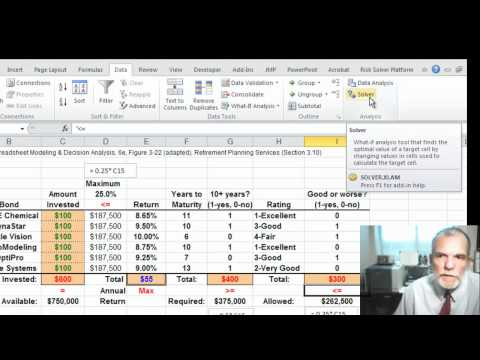

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('gukxBus8lOs')

El objetivo de este problema es determinar la mejor estrategia de inversión, dados diferentes tipos de bono, la máxima cantidad que puede ser invertida en cada bono, el porcentaje de retorno y los años de madurez. También hay una cantidad fija de dinero disponible ($\$750,000$). Por lo menos la mitad de este dinero debe ser invertido en bonos con 10 años o más para la madurez. Se puede invertir un máximo del $25\%$ de esta cantidad en cada bono. Finalmente, hay otra restricción que no permite usar más de $35\%$ en bonos de alto riesgo.

Existen seis (6) opciones de inversión con las letras correspondientes $A_i$

1. $A_1$:(Tasa de retorno=$8.65\%$; Años para la madurez=11, Riesgo=Bajo)
1. $A_2$:(Tasa de retorno=$9.50\%$; Años para la madurez=10, Riesgo=Alto)
1. $A_3$:(Tasa de retorno=$10.00\%$; Años para la madurez=6, Riesgo=Alto)
1. $A_4$:(Tasa de retorno=$8.75\%$; Años para la madurez=10, Riesgo=Bajo)
1. $A_5$:(Tasa de retorno=$9.25\%$; Años para la madurez=7, Riesgo=Alto)
1. $A_6$:(Tasa de retorno=$9.00\%$; Años para la madurez=13, Riesgo=Bajo)

Lo que se quiere entonces es maximizar el retorno que deja la inversión.

Este problema puede ser resuelto con programación lineal. Formalmente, puede ser descrito como:

$$\max_{A_1,A_2,...,A_6}\sum^{6}_{i=1} A_iR_i,$$

donde $A_i$ representa la cantidad invertida en la opción, y $R_i$ representa la tasa de retorno respectiva.

Plantear restricciones...

In [14]:
# Resolver...
c = -np.array([8.65, 9.5, 10, 8.75, 9.25, 9])/100
A = np.array([[-1, -1, 0, -1, 0, -1], [0, 1, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1]])
b = np.array([-.5, .35, 1])*750000
bounds = (0, 0.25*750000)

In [15]:
res_bonos = opt.linprog(c, A_ub=A, b_ub=b, bounds=(bounds, bounds, bounds, bounds, bounds, bounds))

In [17]:
res_bonos.x

array([ 112500.,   75000.,  187500.,  187500.,       0.,  187500.])

### 6.2 Ejemplo 2

**Referencia:**
- https://la.mathworks.com/help/optim/ug/maximize-long-term-investments-using-linear-programming.html

Suponga que se tiene una cantidad inicial de dinero $C_0$ para invertir en un periodo de tiempo $T$ años en $N$ bonos sin cupones. Cada bono paga una tasa de interés compuesta anualmente, y paga el principal más el interés compuesto al final del periodo de madurez. El objetivo es maximizar la cantidad total de dinero después de $T$ años.

Se puede incluir la restricción de que ninguna inversión individual puede superar una fracción del capital total.

Suponga que:
- El capital inicial es $C_0=\$1000$.
- El periodo de tiempo es $T=5$ años.
- El número de bonos es $N=4$.

Para modelar dinero que no se invierte, tenemos una opción $B_0$ disponible cada año que tiene periodo de madurez un año y una tasa de interés del $0\%$.

- El Bono 1, denotado por $B_1$, se puede comprar en el año 1, tiene periodo de madurez de 4 años, y una tasa de interés del $2\%$.
- El Bono 2, denotado por $B_2$, se puede comprar en el año 5, tiene periodo de madurez de 1 año, y una tasa de interés del $4\%$.
- El Bono 3, denotado por $B_3$, se puede comprar en el año 2, tiene periodo de madurez de 4 años, y una tasa de interés del $6\%$.
- El Bono 4, denotado por $B_4$, se puede comprar en el año 2, tiene periodo de madurez de 3 años, y una tasa de interés del $6\%$.

Separando la opción $B_0$ (no invertir) en 5 bonos con periodo de madurez de 1 año y tasa de interés del $0\%$, este problema se puede modelar equivalentemente como si se tuviera un total de 9 bonos disponibles: $B_k$ para $k=1,\dots,9$.

<font color=red>Ver en el tablero una representación gráfica y plantear</font>

In [18]:
# Resolver...
rho = np.array([0, 0, 0, 0, 0, 2, 4, 6, 6])
mad = np.array([1, 1, 1, 1, 1, 4, 1, 4, 3])

r = (1+rho/100)**mad

# Matrices para linprog
c = -np.array([0, 0, 0, 0, r[4], 0, r[6], r[7], 0])
Aeq = np.array([[1, 0, 0, 0, 0, 1, 0, 0, 0], 
                [-r[0], 1, 0, 0, 0, 0, 0, 1, 1],
                [0, -r[1], 1, 0, 0, 0, 0, 0, 0],
                [0, 0, -r[2], 1, 0, 0, 0, 0, 0],
                [0, 0, 0, -r[3], 1, -r[5], 1, 0, -r[8]]])
beq = np.array([1000, 0, 0, 0, 0])

In [19]:
res_bonos2 = opt.linprog(c, A_eq=Aeq, b_eq=beq)

In [20]:
res_bonos2

     fun: -1262.4769600000004
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,  1000.,
           0.])

In [21]:
res_bonos2.x

array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,  1000.,
           0.])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>